# RNN

In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

## 1. Load the data

In [2]:
df = pd.read_csv ('data/appl_1980_2014.csv')

In [3]:
df.head(10)

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
5,2014-06-30,92.10,93.73,92.09,92.93,49482300,92.93
6,2014-06-27,90.82,92.00,90.77,91.98,64006800,91.98
7,2014-06-26,90.37,91.05,89.80,90.90,32595800,90.90
8,2014-06-25,90.21,90.70,89.65,90.36,36852200,90.36
9,2014-06-24,90.75,91.74,90.19,90.28,38988300,90.28


In [6]:
# make sure your data is of actually date format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8465 non-null   object 
 1   Open       8465 non-null   float64
 2   High       8465 non-null   float64
 3   Low        8465 non-null   float64
 4   Close      8465 non-null   float64
 5   Volume     8465 non-null   int64  
 6   Adj Close  8465 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.1+ KB


In [7]:
# date is string format, change to date format
df.Date = pd.to_datetime(df.Date)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8465 non-null   datetime64[ns]
 1   Open       8465 non-null   float64       
 2   High       8465 non-null   float64       
 3   Low        8465 non-null   float64       
 4   Close      8465 non-null   float64       
 5   Volume     8465 non-null   int64         
 6   Adj Close  8465 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 463.1 KB


### Choose the time frame

In [9]:
# get the unique year 
df.Date.dt.year.unique()

array([2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004,
       2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993,
       1992, 1991, 1990, 1989, 1988, 1987, 1986, 1985, 1984, 1983, 1982,
       1981, 1980])

In [10]:
# get the year between 2009 and 2014
cond = (df.Date.dt.year > 2009) & (df.Date.dt.year < 2014)
df = df[cond]
df.Date.dt.year.unique()

array([2013, 2012, 2011, 2010])

### Set date as index

In [13]:
df.index

Int64Index([ 129,  130,  131,  132,  133,  134,  135,  136,  137,  138,
            ...
            1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134],
           dtype='int64', length=1006)

now index is interger seires. For timeseries, index should be DateTime.

In [14]:
# change the index to DateTime
df = df.set_index('Date')
df.index

DatetimeIndex(['2013-12-31', '2013-12-30', '2013-12-27', '2013-12-26',
               '2013-12-24', '2013-12-23', '2013-12-20', '2013-12-19',
               '2013-12-18', '2013-12-17',
               ...
               '2010-01-15', '2010-01-14', '2010-01-13', '2010-01-12',
               '2010-01-11', '2010-01-08', '2010-01-07', '2010-01-06',
               '2010-01-05', '2010-01-04'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

In [17]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2013-12-31,554.17,561.28,554.00,561.02,55771100,79.23
2013-12-30,557.46,560.09,552.32,554.52,63407400,78.31
2013-12-27,563.82,564.41,559.50,560.09,56471100,79.10
2013-12-26,568.10,569.50,563.38,563.90,51002000,79.63
2013-12-24,569.89,571.88,566.03,567.67,41888700,80.17


## 2. EDA

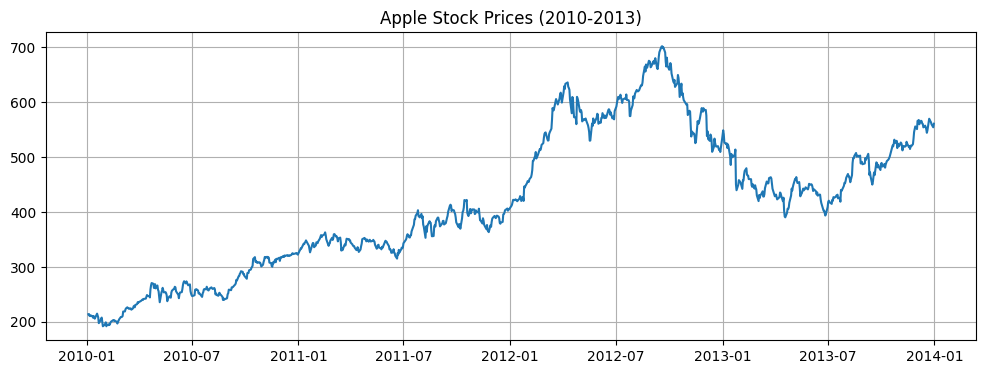

In [21]:
# plot the apple stocks
plt.figure (figsize=(12,4))
plt.plot(df.Close)
plt.title("Apple Stock Prices (2010-2013)")
plt.grid()
plt.show()

<!-- ## 3. Window size features

- use all the past data, to predict the next 1 day
- input is everything until now..
- output is next 15 days -->
## 3. Train Test split

In [22]:
y = df['Close'].values.astype('float')

# take 15 days
train_set = y[:-15]

test_set = y[-15:]

In [25]:
print(type(train_set))

<class 'numpy.ndarray'>


## 4. Normalization

Here we don't do standardization because mean is wrong. 
Normalization - 0 to 1.

In [29]:
train_set.shape

(991,)

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1,1))

train_set_norm = scaler.fit_transform(train_set.reshape(-1,1))

In [28]:
train_set_norm.min(), train_set_norm.max()

(-0.9999999999999999, 1.0)

In [30]:
train_set.shape

(991,)

## 5. Prepare the train set

In [33]:
train_set_norm.shape[0]

961

In [36]:
# convert numpy to tensor
train_set_norm = torch.FloatTensor(train_set_norm).view(-1)
train_set_norm.shape

# define the window size
ws = 30 # use 30 days in the past to predict the next day

# define the function to create training set (ws days -> 1 day)
def create_data(train, ws):
    
    # array to hold the data
    data = []
    
    # i runs from 0 to (991-30)
    for i in range(train.shape[0]-ws):
        
        # x = train[i: i+ws] # 30 days in the past
        x = train[i : i+ws]
        
        # y = train[i+ws: i+ws+1] # next day
        y = train[i+ws : i+ws+1]
        
        data.append((x,y))
        
    return data
        
chaky_data = create_data(train_set_norm, ws)

In [37]:
chaky_data[0]

(tensor([0.4468, 0.4213, 0.4432, 0.4581, 0.4729, 0.4824, 0.3997, 0.3819, 0.4066,
         0.4232, 0.4330, 0.4210, 0.4449, 0.4481, 0.4646, 0.4680, 0.4429, 0.4738,
         0.4624, 0.4676, 0.4084, 0.4274, 0.3877, 0.3385, 0.3006, 0.2852, 0.2904,
         0.2663, 0.2842, 0.2806]),
 tensor([0.3055]))

## 6. Neural Netork

A variant of RNN called LSTM, which is much more powerful.

#### Example

In [46]:
sample, target = chaky_data[0]
sample

tensor([0.4468, 0.4213, 0.4432, 0.4581, 0.4729, 0.4824, 0.3997, 0.3819, 0.4066,
        0.4232, 0.4330, 0.4210, 0.4449, 0.4481, 0.4646, 0.4680, 0.4429, 0.4738,
        0.4624, 0.4676, 0.4084, 0.4274, 0.3877, 0.3385, 0.3006, 0.2852, 0.2904,
        0.2663, 0.2842, 0.2806])

In [47]:
sample.reshape(len(sample), 1, -1).shape

torch.Size([30, 1, 1])

In [51]:
sample_reshape = sample.reshape(sample.shape[0], 1, -1)

In [58]:
lstm = nn.LSTM(1,50) # set hidden size = 50

In [59]:
out, hidden = lstm(sample_reshape)
out[0]

tensor([[ 0.0304, -0.0450,  0.0025,  0.0288,  0.0643, -0.0066, -0.0356,  0.0195,
         -0.0427,  0.0200,  0.0557, -0.0134, -0.0233, -0.0407, -0.0119,  0.0621,
          0.0331,  0.0340, -0.0104, -0.0420, -0.0205, -0.0084, -0.0394, -0.0105,
          0.0111,  0.0100, -0.0410, -0.0546,  0.0072,  0.0139,  0.0326,  0.0069,
         -0.0516,  0.0145,  0.0383, -0.0025, -0.0231,  0.0512,  0.0442,  0.0447,
         -0.0193, -0.0279, -0.0641,  0.0291,  0.0442,  0.0451, -0.0426, -0.0249,
          0.0140, -0.0595]], grad_fn=<SelectBackward0>)

In [60]:
# hidden[0]

tensor([[[ 0.0828, -0.0906,  0.0434,  0.0363,  0.1265, -0.0169, -0.0711,
           0.0841, -0.0860,  0.0377,  0.0985, -0.0295, -0.0178, -0.0828,
           0.0019,  0.1404,  0.0974,  0.0795, -0.0242, -0.0602, -0.0317,
          -0.0046, -0.0455, -0.0081,  0.0345,  0.0555, -0.0803, -0.1073,
           0.0090,  0.0387,  0.0621,  0.0397, -0.0984,  0.0161,  0.0904,
           0.0198, -0.0390,  0.1722,  0.0919,  0.1131, -0.0241, -0.0375,
          -0.0715,  0.0313,  0.0855,  0.0836, -0.0782, -0.0464,  0.0107,
          -0.0976]]], grad_fn=<StackBackward0>)

In [67]:
out.shape # 30 samples, each sampel has 50 hidden layer

torch.Size([30, 1, 50])

In [68]:
hidden[0].shape # hidden layer size for each sample

torch.Size([1, 1, 50])

In [71]:
# assert out[-1] == hidden[0]

In [70]:
out = out.view(len(out), -1)
out.shape

torch.Size([30, 50])

In [72]:
linear_layer = nn.Linear(50,1)

In [73]:
out = linear_layer(out)
out.shape

torch.Size([30, 1])

#### Network

In [62]:
class chaky_RNN (nn.Module):
    def __init__(self, input_size = 1, hidden_size = 30,output_size = 1):
        super().__init__()
        self.hs     = hidden_size
        self.lstm   = nn.LSTM(input_size, hidden_size) # LSTM will automatically create W(s) for us
        self.linear = nn.Linear(hidden_size, output_size) # take output of LSTM, project to predict
        

    def forward(self, input_):
        out = self.lstm(input_.reshape(input_.shape[0], 1, -1)) # 30, 1, 1
        out = self.linear (out.view(len(input_), -1)) # change shape = 30, 50
        return out[-1]